In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
%tensorflow_version 1.x
import cv2
import numpy as np
import tensorflow as tf
import pickle 

from keras.datasets import mnist
from keras.layers import Input, Dense,Activation, Conv2D, AveragePooling2D, Flatten, Dropout
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')




In [31]:
def load_dataset():

  pickle_X_train = open("/content/drive/MyDrive/Colab Notebooks/train_x.pickle", "rb")
  pickle_X_test = open("/content/drive/MyDrive/Colab Notebooks/test_x.pickle", "rb")
  pickle_Y_train = open("/content/drive/MyDrive/Colab Notebooks/train_y.pickle", "rb")
  pickle_Y_test = open("/content/drive/MyDrive/Colab Notebooks/test_y.pickle", "rb")

  X = pickle.load(pickle_X_train)
  X_test = pickle.load(pickle_X_test)
  Y = pickle.load(pickle_Y_train)
  Y_test = pickle.load(pickle_Y_test)

  pickle_X_train.close()
  pickle_Y_train.close()
  pickle_X_test.close()
  pickle_Y_test.close()
  return (X, Y), (X_test, Y_test)

def load_dataset_train():

  pickle_X_train = open("/content/drive/MyDrive/Colab Notebooks/train_x.pickle", "rb")
  pickle_Y_train = open("/content/drive/MyDrive/Colab Notebooks/train_y.pickle", "rb")

  X = pickle.load(pickle_X_train)
  Y = pickle.load(pickle_Y_train)

  pickle_X_train.close()
  pickle_Y_train.close()
  return (X, Y)

In [32]:
(x_train, y_train) = load_dataset_train()
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train , test_size=0.1, shuffle=True, random_state=5)
image_size = x_train.shape[1]

x_train = x_train.astype('float32')/255
test_x = test_x.astype('float32')/255
print(x_train.shape)

(3684, 200, 200, 3)


In [34]:
# x_train = x_train.reshape((-1,28,28,1))
# x_test = x_test.reshape((-1,28,28,1))
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [35]:
print("train_x shape is {}".format( train_x.shape ))
print("train_y shape is {}".format( train_y.shape ))
print("test_x shape is {}".format( test_x.shape ))
print("test_y shape is {}".format( test_y.shape ))

train_x shape is (3315, 200, 200, 3)
train_y shape is (3315, 3)
test_x shape is (369, 200, 200, 3)
test_y shape is (369, 3)


In [36]:
def build_model(input_shape):
  
  x_input = Input(shape =input_shape,name = 'input')

  x = Conv2D(filters = 6,kernel_size = 5, strides = 1, padding = 'valid',name = 'conv1')(x_input)
  x = Activation('relu', name = 'relu_1')(x)
  x = AveragePooling2D(pool_size =2,strides = 2,name = 'pad1')(x)

  x = Conv2D(filters = 16,kernel_size = (2,2), strides = 1, padding = 'valid',name = 'conv2')(x_input)
  x = Activation('relu', name = 'relu_2')(x)
  x = AveragePooling2D(pool_size =2,strides = 2,name = 'pad2')(x)

  x = Flatten()(x)

  x = Dense(units = 120, name = 'fc_1')(x)

  x = Activation('relu', name = 'relu_3')(x)
  # x = Dropout(rate = 0.3)

  x = Dense(units = 84, name = 'fc_2')(x)
  x = Activation('relu', name = 'relu_4')(x)
  # x = Dropout(rate = 0.3)


  outputs = Dense(units = 3,name = 'softmax', activation='softmax')(x)
  
  model = Model(inputs = x_input, outputs = outputs)
  model.summary()

  return model
  

In [37]:
model = build_model(input_shape=(200, 200, 3))
model.compile(optimizer = 'adam', loss='categorical_crossentropy' ,metrics = ['accuracy'])


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 200, 200, 3)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 199, 199, 16)      208       
_________________________________________________________________
relu_2 (Activation)          (None, 199, 199, 16)      0         
_________________________________________________________________
pad2 (AveragePooling2D)      (None, 99, 99, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 156816)            0         
_________________________________________________________________
fc_1 (Dense)                 (None, 120)               18818040  
_________________________________________________________________
relu_3 (Activation)          (None, 120)               0   

In [38]:
datagen = ImageDataGenerator(
          rotation_range=45,
          width_shift_range=0.2,
          height_shift_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

batch_size = 64
 
H = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size),
  validation_data=(test_x, test_y),                       
	steps_per_epoch=len(train_y) // batch_size, epochs=16)

Epoch 1/16
51/51 [==============================] - 28s 547ms/step - loss: 638.6788 - accuracy: 0.4149 - val_loss: 0.9334 - val_accuracy: 0.7967
Epoch 2/16
51/51 [==============================] - 25s 485ms/step - loss: 23.8980 - accuracy: 0.6309 - val_loss: 0.8668 - val_accuracy: 0.6423
Epoch 3/16
51/51 [==============================] - 25s 495ms/step - loss: 23.8553 - accuracy: 0.6426 - val_loss: 0.8033 - val_accuracy: 0.8076
Epoch 4/16
51/51 [==============================] - 25s 487ms/step - loss: 45.0792 - accuracy: 0.6327 - val_loss: 0.7541 - val_accuracy: 0.6802
Epoch 5/16
51/51 [==============================] - 25s 482ms/step - loss: 20.9321 - accuracy: 0.7508 - val_loss: 0.8006 - val_accuracy: 0.6125
Epoch 6/16
51/51 [==============================] - 25s 482ms/step - loss: 9.7593 - accuracy: 0.7902 - val_loss: 0.8461 - val_accuracy: 0.6152
Epoch 7/16
51/51 [==============================] - 24s 477ms/step - loss: 7.6957 - accuracy: 0.8068 - val_loss: 0.8739 - val_accuracy: 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


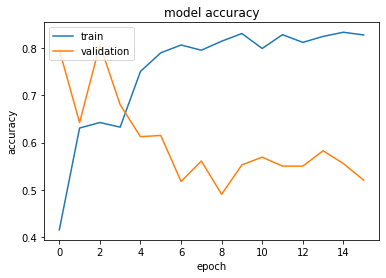

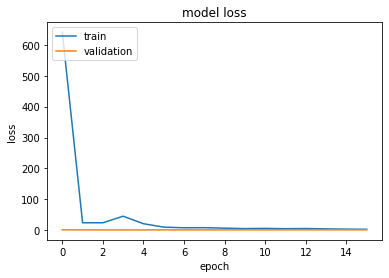

In [39]:
print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

2


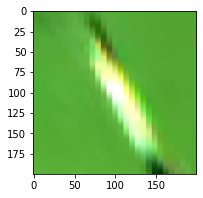

In [44]:
sample = train_x[np.random.randint(len(train_x))]


batch = np.expand_dims(sample, axis=0)
prediction = model.predict(batch)
print(   np.argmax(prediction[0])    )

# sample_show = sample.reshape((28,28))
plt.figure(figsize=(3,3))
sample = sample[:,:,::-1]
plt.imshow(sample)
plt.show()

In [46]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model.h5")

In [47]:
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.h5")
